In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from import_clean_data import load_annotated_meter_data, load_co2_data
import warnings

In [2]:
DATA_DIR = (Path.cwd() / ".." / "Data").resolve()

In [3]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    meter = load_annotated_meter_data(DATA_DIR)

In [4]:
meter

,id,Chargepoint,connector,charge_log_id,metervalue,increment,timestamp,co2_intensity,co2_total,unique_charge_point
0,1057264,1,1,2188,155260,920,2021-01-01 00:15:00,162.516673,0.037379,1|1
1,978733,2,1,2190,2213880,0,2021-01-01 00:15:00,162.516673,0.000000,2|1
2,978738,3,1,2195,3081670,0,2021-01-01 00:15:00,162.516673,0.000000,3|1
3,978742,4,1,2194,1463670,0,2021-01-01 00:15:00,162.516673,0.000000,4|1
4,978746,5,1,1923,1836900,0,2021-01-01 00:15:00,162.516673,0.000000,5|1
...,...,...,...,...,...,...,...,...,...,...
315492,978722,25,1,2201,478370,0,2021-01-01 00:00:00,161.151006,0.000000,25|1
315493,978724,26,1,1965,252472,0,2021-01-01 00:00:00,161.151006,0.000000,26|1
315494,978728,28,1,2199,332544,1173,2021-01-01 00:00:00,161.151006,0.047258,28|1
315495,982914,29,1,2197,805520,0,2021-01-01 00:00:00,161.151006,0.000000,29|1


In [5]:
meter.dtypes

id                              int64
Chargepoint                    object
connector                      object
charge_log_id                  object
metervalue                      int64
increment                       int64
timestamp              datetime64[ns]
co2_intensity                 float64
co2_total                     float64
unique_charge_point            object
dtype: object

In [6]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    co2 = load_co2_data(DATA_DIR)

In [7]:
co2

,datetime,co2_intensity,co2_production,co2_import,nuclear,geothermal,biomass,coal,wind,solar,hydro,gas,oil,unknown,battery,hydro
0,2020-01-01 00:00:00+00:00,115.53,42.25,239.46,3321.21,0.14,235.03,442.94,445.71,0.00,1034.33,293.46,18.54,1038.76,0.0,181.97
1,2020-01-01 01:00:00+00:00,113.57,46.79,255.94,3224.89,0.14,224.68,432.04,437.79,0.00,1046.74,245.34,17.31,1323.84,0.0,181.31
2,2020-01-01 02:00:00+00:00,113.70,30.13,235.80,3671.14,3.17,252.13,471.63,472.28,0.01,1107.86,306.60,20.47,586.79,0.0,81.00
3,2020-01-01 03:00:00+00:00,110.52,48.75,231.63,3638.54,9.61,206.78,376.36,365.74,0.02,1036.09,323.40,17.47,1510.04,0.0,97.00
4,2020-01-01 04:00:00+00:00,111.10,41.83,240.52,3571.64,5.70,222.40,411.97,397.42,0.02,1041.85,290.49,18.23,1123.35,0.0,97.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,2021-06-30 19:00:00+00:00,74.55,71.97,NaN,918.46,0.00,0.00,0.00,0.00,0.00,1812.00,0.00,0.00,2405.48,0.0,1064.06
13124,2021-06-30 20:00:00+00:00,78.65,77.04,NaN,943.88,0.00,0.00,0.00,0.00,0.00,1715.01,0.00,0.00,2823.69,0.0,1052.42
13125,2021-06-30 21:00:00+00:00,103.10,71.17,348.64,1061.13,0.22,52.81,184.39,128.09,0.00,1456.45,83.60,4.48,2066.78,0.0,692.06
13126,2021-06-30 22:00:00+00:00,120.71,82.12,342.61,1215.24,0.34,76.70,251.02,193.26,0.01,967.38,95.31,6.64,2635.87,0.0,198.25


In [8]:
co2.dtypes

datetime          datetime64[ns, UTC]
co2_intensity                 float64
co2_production                float64
co2_import                    float64
nuclear                       float64
geothermal                    float64
biomass                       float64
coal                          float64
wind                          float64
solar                         float64
hydro                         float64
gas                           float64
oil                           float64
unknown                       float64
battery                       float64
hydro                         float64
dtype: object

In [83]:
charging_df = pd.read_csv(DATA_DIR / 'seperated_meter_data.csv')
charging_df['full_ts'] = charging_df.apply(lambda t: pd.Timestamp(t['n_timestamp'], unit='s', tz='UTC'), axis=1)
charging_df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,id,Chargepoint,connector,charge_log_id,metervalue,increment,timestamp,unique_charge_point,n_timestamp,full_ts
0,696714,80169,171.0,178d3d4a-065b-4c88-9e1e-a10270de3f44,e978caff-2a56-46c0-acd0-b09b54a8ff82,345800,0,01.01.2020 00:15,171.0178d3d4a-065b-4c88-9e1e-a10270de3f44,1.577834e+09,2019-12-31 23:15:00+00:00
1,696715,78227,172.0,25fde958-fc63-4d7a-a773-6023f2a58291,5236702e-a0cd-472f-987a-63418ba711dc,1438400,0,01.01.2020 00:15,172.025fde958-fc63-4d7a-a773-6023f2a58291,1.577834e+09,2019-12-31 23:15:00+00:00
2,696718,4333,174.0,3e77b1c0-8a23-4624-993e-77a914198cd7,24aaf8b7-f58c-453e-a948-bc6f7829c9e2,2551993,0,01.01.2020 00:15,174.03e77b1c0-8a23-4624-993e-77a914198cd7,1.577834e+09,2019-12-31 23:15:00+00:00
3,696719,55377,175.0,24d53420-ba27-45c5-a585-c74243a50baa,df3ff415-56fb-40ab-b0ee-270a8415ad3a,254570,0,01.01.2020 00:15,175.024d53420-ba27-45c5-a585-c74243a50baa,1.577834e+09,2019-12-31 23:15:00+00:00
4,696720,50501,176.0,2b0f6664-e791-4ea8-945f-b2b88666568e,cae33978-53ce-4f36-a6a5-c73540bb74da,742970,2740,01.01.2020 00:15,176.02b0f6664-e791-4ea8-945f-b2b88666568e,1.577834e+09,2019-12-31 23:15:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...
728313,696679,2098656,15.0,1,14980,8884700,2800,01.08.2021 00:00,15.01,1.627769e+09,2021-07-31 22:00:00+00:00
728314,696683,2098680,1.0,1,14290,2744170,0,01.08.2021 00:00,1.01,1.627769e+09,2021-07-31 22:00:00+00:00
728315,696687,2098704,40.0,1,14957,605998,0,01.08.2021 00:00,40.01,1.627769e+09,2021-07-31 22:00:00+00:00
728316,696688,2098710,81.0,1,14981,1686113,1751,01.08.2021 00:00,81.01,1.627769e+09,2021-07-31 22:00:00+00:00


In [10]:
charges_stat = pd.DataFrame(set(charging_df['charge_log_id']), columns=['charge_log_id'])
charges_stat

,charge_log_id
0,d5e2d1bf-296e-4cbc-9938-02137e07f352
1,dd109b9b-d325-419f-a30c-2fdda46cb039
2,96f3961e-cb7b-4689-b808-742c788c901e
3,d5708c48-c799-42ae-8857-5f4edf8aabd9
4,94cab04f-0852-45f4-90df-066393011097
...,...
13073,520aff15-5ad8-467b-932c-c40a60a8af18
13074,77e955fe-c882-4789-800d-bcfcd1768c3a
13075,85bdcd27-c127-4121-a759-61ef7b1c7114
13076,346b4922-13e4-4b1f-85b7-e6d0266ec01a


In [86]:
grouped = charging_df.groupby('charge_log_id')
charges_stats = pd.DataFrame(grouped['full_ts'].min()).rename(columns={'full_ts' : 'start_time'})
charges_stats['charge_log_id'] = charges_stats.index
charges_stats['end_time'] = grouped['full_ts'].max()
charges_stats['total_energy'] = grouped['increment'].sum()
charges_stats['max_energy'] = grouped['increment'].max()
charges_stats['mean_energy'] = grouped['increment'].max()
charges_stats['median_energy'] = grouped['increment'].max()
charges_stats['charge_time'] = charges_stats.apply(lambda t: (t['end_time'] - t['start_time']), axis=1)

In [87]:
charges_stats

,start_time,charge_log_id,end_time,total_energy,max_energy,mean_energy,median_energy,charge_time
charge_log_id,,,,,,,,
885,2020-12-04 10:45:00+00:00,885,2020-12-04 18:00:00+00:00,50,10,10,10,0 days 07:15:00
963,2020-12-04 11:00:00+00:00,963,2020-12-05 15:30:00+00:00,30,10,10,10,1 days 04:30:00
975,2020-12-04 10:45:00+00:00,975,2020-12-04 14:00:00+00:00,20,10,10,10,0 days 03:15:00
978,2020-12-04 10:45:00+00:00,978,2020-12-04 16:15:00+00:00,0,0,0,0,0 days 05:30:00
981,2020-12-04 10:45:00+00:00,981,2020-12-04 11:00:00+00:00,0,0,0,0,0 days 00:15:00
...,...,...,...,...,...,...,...,...
ff9ff3ff-9044-4d07-af32-01ba1f7c30f9,2020-08-14 19:15:00+00:00,ff9ff3ff-9044-4d07-af32-01ba1f7c30f9,2020-08-19 11:45:00+00:00,16590,860,860,860,4 days 16:30:00
ffa52837-2a09-44ca-95c0-d048d3cdb938,2020-03-05 21:15:00+00:00,ffa52837-2a09-44ca-95c0-d048d3cdb938,2020-03-05 21:45:00+00:00,2360,2350,2350,2350,0 days 00:30:00
ffc33f55-09c4-49ad-921a-cfe80e68fbf7,2020-03-06 05:00:00+00:00,ffc33f55-09c4-49ad-921a-cfe80e68fbf7,2020-03-06 05:15:00+00:00,0,0,0,0,0 days 00:15:00


In [88]:
charges_stats.index = range(len(charges_stats))

In [155]:
# Get one of the charges
def offset_charge_table(charge_record, co2, charging_df):

    # Find how long it takes and when it starts (all rounded)
    duration = charge_record['charge_time'].round(freq='H')
    hours = (duration.days * 24 + duration.seconds // 3600)

    scores_by_shift = {}

    for possible_offset in range(hours):
        start_time = charge_record['start_time'] + pd.Timedelta(possible_offset, unit='H')
        rounded_start_time = start_time.round(freq='H')

        # Get corresponding co2 readings
        starting_index = co2[co2['datetime'] == rounded_start_time].index[0]
        end_index = starting_index + hours
        co2_readings = co2.iloc[starting_index:end_index]

        # Get the charge
        particular_charge = charging_df[charging_df['charge_log_id'] == charge_record['charge_log_id']].copy()
        particular_charge.sort_values(by=['full_ts'], inplace=True)
        offset = rounded_start_time - start_time
        particular_charge['full_ts'] += offset
        particular_charge['rounded_ts'] = particular_charge['full_ts'].apply(lambda t: t.floor(freq='H'))
        grouped_by_hour_increments = particular_charge.groupby('rounded_ts')['increment'].sum()

        lenght_used = min(len(co2_readings), len(grouped_by_hour_increments))
        co2_used = co2_readings['co2_intensity'].to_numpy()[:lenght_used] * grouped_by_hour_increments.to_numpy()[:lenght_used]
        final_score = co2_used.sum()
        scores_by_shift[possible_offset] = final_score
    return scores_by_shift


def optimal_charge(table):
    if len(table) == 0: return None
    min_val = min(table.values())
    off = [k for k in table if table[k] == min_val][0]
    return (off, min_val)

In [201]:
import time
start = time.time()
savings = []

for i in range(100):
    charge_record = charges_stats.iloc[i]
    table = offset_charge_table(charge_record, co2, charging_df)
    r = optimal_charge(table)
    if r is None: continue
    off, min_val = r
    baseline = table[0]
    if baseline == 0: continue
    savings.append(min_val/baseline)
    #print("Baseline: " + str(baseline) + " optimal offset " + str(off) + " optimal: " + str(min_val) + " saving: " + str(min_val/baseline))
    
end = time.time()
print(end - start)

np.asarray(savings).mean()

93.89072513580322


0.8237852592814724

In [209]:
import statistics
statistics.median(savings)

0.8854698303958529

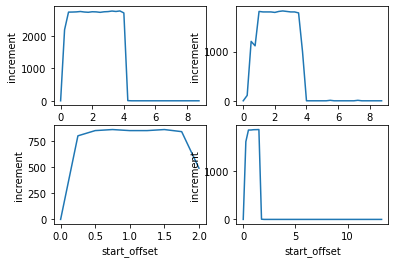

In [193]:
import random
import seaborn as sns 
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2)

def plot_a_charge(c_id, charging_df, ax):
    single_charge = charging_df[charging_df['charge_log_id'] == c_id].copy()
    single_charge['start_offset'] = (single_charge['n_timestamp'] - single_charge['n_timestamp'].min()) / 3600
    sns.lineplot(x=single_charge['start_offset'], y=single_charge['increment'], ax=ax)
    
plot_a_charge(random.choice(charges_stats['charge_log_id']), charging_df, axs[0][0])
plot_a_charge(random.choice(charges_stats['charge_log_id']), charging_df, axs[1][0])
plot_a_charge(random.choice(charges_stats['charge_log_id']), charging_df, axs[0][1])
plot_a_charge(random.choice(charges_stats['charge_log_id']), charging_df, axs[1][1])

fig.savefig('something.png')

In [167]:
single_charge

,Unnamed: 0,id,Chargepoint,connector,charge_log_id,metervalue,increment,timestamp,unique_charge_point,n_timestamp,full_ts
240410,1073924,781016,29.0,1,438,576560,0,19.11.2020 14:15,29.01,1.605792e+09,2020-11-19 13:15:00+00:00
240416,1073941,781015,29.0,1,438,577300,740,19.11.2020 14:30,29.01,1.605793e+09,2020-11-19 13:30:00+00:00
240429,1073956,781096,29.0,1,438,578220,920,19.11.2020 14:45,29.01,1.605794e+09,2020-11-19 13:45:00+00:00
240439,1073973,781095,29.0,1,438,579150,930,19.11.2020 15:00,29.01,1.605794e+09,2020-11-19 14:00:00+00:00
240450,1073988,781165,29.0,1,438,580070,920,19.11.2020 15:15,29.01,1.605795e+09,2020-11-19 14:15:00+00:00
240459,1074005,781164,29.0,1,438,581000,930,19.11.2020 15:30,29.01,1.605796e+09,2020-11-19 14:30:00+00:00
240470,1074020,781238,29.0,1,438,581920,920,19.11.2020 15:45,29.01,1.605797e+09,2020-11-19 14:45:00+00:00
240479,1074037,781237,29.0,1,438,582520,600,19.11.2020 16:00,29.01,1.605798e+09,2020-11-19 15:00:00+00:00
240486,1074054,781301,29.0,1,438,582570,50,19.11.2020 16:15,29.01,1.605799e+09,2020-11-19 15:15:00+00:00
240500,1074072,781300,29.0,1,438,582570,0,19.11.2020 16:30,29.01,1.605800e+09,2020-11-19 15:30:00+00:00
